# Simulation Dot Plots

Here, we compare the baseline to the scenarios.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data

In [2]:
result = pd.read_csv('tables/sim_results/sim_results.csv')

In [3]:
result.head()

Urban_name Climate Zone  Coastal?  Baseline $\Delta$AT Day AWM  \
0      Abilene, TX    Temperate     False                    -0.013062   
1       Albany, OR    Temperate     False                     0.024125   
2  Albuquerque, NM         Arid     False                     0.146844   
3   Alexandria, LA    Temperate     False                    -0.011185   
4    Alton, IL--MO    Temperate     False                     0.041421   

   Baseline $\Delta$AT Day (25th %tile)  \
0                              0.426707   
1                              0.473501   
2                              2.391964   
3                              0.141920   
4                              0.406859   

   Baseline $\Delta$AT Day (25th %tile) Std  \
0                                  0.114001   
1                                  0.284908   
2                                  0.456739   
3                                  0.141223   
4                                  0.101491   

   Baseline $\Delta$AT Day (75th %tile)  \
0                             -0.084702   
1                              0.034839   
2                             -0.607033   
3                             -0.046097   
4                             -0.001700   

   Baseline $\Delta$AT Day (75th %tile) Std  Baseline $\Delta$AT Day Gap  \
0                                  0.192970                    -0.511409   
1                                  0.052425                    -0.438663   
2                                  2.042812                    -2.998997   
3                                  0.081814                    -0.188017   
4                                  0.067445                    -0.408559   

   Baseline $\Delta$AT Night AWM  Baseline $\Delta$AT Night (25th %tile)  \
0                       0.035357                                0.417465   
1                       0.020883                                0.907743   
2                       0.152624                                1.844873   
3                       0.007074                                0.107185   
4                       0.058170                                0.534732   

   Baseline $\Delta$AT Night (25th %tile) Std  \
0                                    0.143012   
1                                    0.062471   
2                                    0.617917   
3                                    0.156283   
4                                    0.184482   

   Baseline $\Delta$AT Night (75th %tile)  \
0                               -0.034359   
1                                0.094063   
2                                0.395542   
3                               -0.004922   
4                               -0.006221   

   Baseline $\Delta$AT Night (75th %tile) Std  Baseline $\Delta$AT Night Gap  \
0                                    0.150640                      -0.451824   
1                                    0.049316                      -0.813679   
2                                    1.051646                      -1.449331   
3                                    0.034744                      -0.112107   
4                                    0.146554                      -0.540953   

   Baseline $\Delta$LST Day AWM  Baseline $\Delta$LST Day (25th %tile)  \
0                     -0.050014                               1.219299   
1                      0.250133                               3.694146   
2                      0.165249                               3.266532   
3                      0.143191                               1.653573   
4                      0.473744                               3.477486   

   Baseline $\Delta$LST Day (25th %tile) Std  \
0                                   0.562781   
1                                   1.629748   
2                                   0.966388   
3                                   1.517227   
4                                   1.307299   

   Baseline $\Delta$LST Day (75th %tile)  \
0                      

In [4]:
result[['Baseline $\\Delta$AT Day AWM', 
        'Baseline $\\Delta$AT Day (25th %tile)', 
        'Baseline $\\Delta$AT Day (75th %tile)']].mean()

Baseline $\Delta$AT Day AWM             0.067493
Baseline $\Delta$AT Day (25th %tile)    0.562515
Baseline $\Delta$AT Day (75th %tile)    0.063508
dtype: float64

## Helper Function

In [5]:
def dot_plot(label, sims, xaxis_title, filename, y_legend, arrow_offset, linspace_offset, 
             min_arrow_gap=0.2, min_gap_offset=0.2, gap_label_x='midpoint', width=850, height=600):
    #diff_list  = []
    awm_list   = []
    uhi25_list = []
    uhi75_list = []
    for sim in sims:
        awm = result[sim + ' ' + label + ' AWM'].mean()
        awm_list.append(awm)
        uhi25 = result[sim + ' ' + label + ' (25th %tile)'].mean()
        uhi25_list.append(uhi25)
        uhi75 = result[sim + ' ' + label + ' (75th %tile)'].mean()
        uhi75_list.append(uhi75)
        #diff  = uhi75-uhi25
        #diff_list.append(diff)
        
    n_sims = len(sims)
    dot_df = pd.DataFrame({'scenario': sims*2, 'uhi': uhi25_list + uhi75_list,
                           'Median Income Percentile': ['25th']*n_sims + ['75th']*n_sims})
    awm_df = pd.DataFrame({'scenario': sims, 'awm': awm_list})
    diff = pd.DataFrame({'scenario': sims, 'uhi25': uhi25_list,  'uhi75': uhi75_list})
    diff['diff'] = diff['uhi75'] - diff['uhi25']
    diff['diff_abs'] = abs(diff['uhi75'] - diff['uhi25'])
    diff['mid_point'] = (diff['uhi25'] + diff['uhi75']) / 2
    
    #display(diff.sort_values(by='diff_abs', ascending=True))

    fig = go.Figure()

    # Add traces
    fig.add_trace(go.Scatter(x=dot_df[dot_df['Median Income Percentile']=='25th']['uhi'], 
                             y=dot_df[dot_df['Median Income Percentile']=='25th']['scenario'],
                             mode='markers', marker=dict(size=15),
                             name='25th'))
    fig.add_trace(go.Scatter(x=dot_df[dot_df['Median Income Percentile']=='75th']['uhi'], 
                             y=dot_df[dot_df['Median Income Percentile']=='75th']['scenario'],
                             mode='markers', marker=dict(size=15),
                             name='75th'))
    
    baseline_median_gap = result['Baseline ' + label + ' Gap'].median()
    offset = 1
    y0=9.75
    y1=10.25
    temp_df = diff.sort_values(by='diff_abs', ascending=True).reset_index()
    for d in temp_df['scenario'].to_list():
        #sim_diff = temp_df[temp_df['scenario']==d]['diff'].to_list()[0]
        # baseline versus scenario gap
        mean_awm = awm_df[awm_df['scenario']==d]['awm'].to_list()[0]
        fig.add_shape(
        type="line",
        x0=mean_awm, x1=mean_awm,
        y0=y0, y1=y1,
        line_width=2, line_dash='dot',
        )
        y0-=offset
        y1-=offset
    
    for d in diff['scenario'].to_list():
        uhi25 = diff[diff['scenario']==d]['uhi25'].to_list()[0]
        uhi75 = diff[diff['scenario']==d]['uhi75'].to_list()[0]
        sim_diff = diff[diff['scenario']==d]['diff'].to_list()[0]
        # baseline versus scenario gap
        median_change = baseline_median_gap - sim_diff
        # change direction of arrow based on the gap direction
        if uhi75 < uhi25:
            uhi25_arrow_offset = -arrow_offset
            uhi75_arrow_offset = arrow_offset
            # if the gap is really small, move the arrows to the left of the dots
            if abs(sim_diff) < min_arrow_gap:
                uhi25_arrow_offset -= min_gap_offset #0.2
                if label == '$\\Delta$AT Day':
                    uhi75_arrow_offset -= min_gap_offset+0.15 #0.35
                if label == '$\\Delta$LST Day':
                    uhi75_arrow_offset -= min_gap_offset + 0.6
                    #print(uhi75 + uhi75_arrow_offset)
                    #if abs(sim_diff) < 0.18:
                    #    uhi75_arrow_offset -= 0.5
                        #print(uhi75 + uhi75_arrow_offset)        
            if label == '$\\Delta$LST Day':
                if round(abs(sim_diff),2) == 0.56:
                    uhi75_arrow_offset -= 0.15 #0.75
                    uhi25_arrow_offset -= 0.15
            uhi25_triangle = 'triangle-right'
            uhi75_triangle = 'triangle-left'
        else:
            uhi25_arrow_offset = -arrow_offset
            uhi75_arrow_offset = arrow_offset
            if abs(sim_diff) < min_arrow_gap:
                uhi25_arrow_offset -= min_gap_offset #0.2
                uhi75_arrow_offset -= min_gap_offset #0.2
            uhi25_triangle = 'triangle-left'
            uhi75_triangle = 'triangle-right'
        fig.add_trace(go.Scatter(x=[uhi25 + uhi25_arrow_offset], 
                                 y=[d], 
                                 mode='markers', marker={'color': '#636EFA', 
                                                         'size': 20, 'symbol':uhi25_triangle},
                                 showlegend=False))
        fig.add_trace(go.Scatter(x=[uhi75 + uhi75_arrow_offset], 
                                 y=[d], 
                                 mode='markers', marker={'color': '#EF553B', 
                                                         'size': 20, 'symbol':uhi75_triangle},
                                 showlegend=False))
        
        # linspace offset parameter
        linspace_n = 200
        # change direction of gradient based on the gap direction
        if uhi25 < uhi75:
            x_linspace = np.linspace(uhi25+linspace_offset, uhi75-linspace_offset, linspace_n)
            if abs(sim_diff) < min_arrow_gap:
                x_linspace = np.linspace(uhi25+linspace_offset-min_gap_offset, uhi75-linspace_offset-min_gap_offset, linspace_n)
            if abs(sim_diff) < 0.03:                           
                x_linspace = np.linspace(uhi25+linspace_offset-min_gap_offset-0.03, uhi75-linspace_offset-min_gap_offset+0.03, linspace_n)
            #if label == '$\\Delta$LST Day':
            #    if (round(abs(sim_diff),2)==0.07):
            #        x_linspace = np.linspace(uhi25 + uhi25_arrow_offset+0.1, uhi75 + uhi75_arrow_offset-0.1, linspace_n)
            arrow_colorscale = [(0.0, "#636EFA"), (0.5, "yellow"), (1.0, "#EF553B")]
        else:
            x_linspace = np.linspace(uhi75+linspace_offset, uhi25-linspace_offset, linspace_n)
            #print(x_linspace)
            if abs(sim_diff) < min_arrow_gap:
                #x_linspace = np.linspace(uhi75+linspace_offset-min_gap_offset, uhi25-linspace_offset-min_gap_offset, linspace_n)
                if label == '$\\Delta$AT Day':
                    x_linspace = np.linspace(uhi75 + uhi75_arrow_offset +0.025, uhi25 + uhi25_arrow_offset-0.025, linspace_n)
                if label == '$\\Delta$LST Day':
                    #x_linspace = np.linspace(uhi75 + uhi75_arrow_offset +0.04, uhi25 + uhi25_arrow_offset-0.04, linspace_n)
                    #x_linspace = np.linspace(uhi75 + uhi75_arrow_offset +0.2, uhi25 + uhi25_arrow_offset-0.2, linspace_n)
                    if (round(abs(sim_diff),2)==0.01):
                        x_linspace = np.linspace(uhi75 + uhi75_arrow_offset +0.1, uhi25 + uhi25_arrow_offset-0.1, linspace_n)
                    if (round(abs(sim_diff),2)==0.43):
                        #x_linspace = np.linspace(uhi75 + uhi75_arrow_offset +0.15-0.1, uhi25 + uhi25_arrow_offset-0.15, linspace_n)
                        x_linspace = np.linspace(uhi75 + uhi75_arrow_offset +0.1, uhi25 + uhi25_arrow_offset-0.1, linspace_n)
            arrow_colorscale = [(0.0, "#EF553B"), (0.5, "yellow"), (1.0, "#636EFA")]
        fig.add_trace(go.Scatter(x=x_linspace, 
                                 y=[d]*linspace_n, 
                                 mode='markers', marker={'color': x_linspace, 
                                                         'colorscale': arrow_colorscale, 
                                                         'size': 15, 'symbol':'square', 'opacity':0.8},
                                 showlegend=False))
        
        textfont_color='black'
        mid_point = diff[diff['scenario']==d]['mid_point']
        if abs(sim_diff) < min_arrow_gap:
            mid_point -= min_gap_offset #0.2
        if (abs(sim_diff) < min_arrow_gap) & (uhi75 < uhi25):
            if label == '$\\Delta$AT Day':
                if (round(abs(sim_diff),2)==0.02):
                    mid_point -= 0.075 - 0.02
                    textfont_color = 'white'
                if (round(abs(sim_diff),2)==0.09): 
                    mid_point -= 0.075 - 0.05
                    textfont_color = 'white'
                if (round(abs(sim_diff),2)==0.13):
                    mid_point -= 0.075 - 0.07
                    textfont_color = 'white'
            if label == '$\\Delta$LST Day':
                mid_point -= 0.3
        #if (label == '$\\Delta$AT Day') & (round(abs(sim_diff),2)==0.15):
        #    mid_point -= -0.015 
        #    textfont_color = 'white'
        #if (label == '$\\Delta$AT Day') & (round(abs(sim_diff),2)==0.17):
        #    mid_point -= -0.0215 #-0.0195
        #    textfont_color = 'white'
        if (label == '$\\Delta$AT Day') & (round(abs(sim_diff),2)==0.23):
            mid_point -= 0.0185
            textfont_color = 'black'
        if (label == '$\\Delta$AT Day') & (round(abs(sim_diff),2)==0.26):
            mid_point -= 0.0185
            textfont_color = 'black'
        if (label == '$\\Delta$LST Day') & (round(abs(sim_diff),2)==0.56):
            mid_point -= -0.095 #-0.045
            textfont_color = 'white'
        if (label == '$\\Delta$LST Day') & (round(abs(sim_diff),2)==0.07):
            mid_point += 0.1
            textfont_color = 'white'
        if (label == '$\\Delta$LST Day') & (round(abs(sim_diff),2)==0.37):
            mid_point += 0.175
            textfont_color = 'white'
        if (label == '$\\Delta$LST Day') & (round(abs(sim_diff),2)==1.08):
            mid_point += 0.225
            textfont_color = 'white'
        fig.add_trace(go.Scatter(x=mid_point, 
                                 y=[d], 
                                 text=str(round(sim_diff,2)), mode='text', showlegend=False, textfont_color=textfont_color))
        

    fig.update_yaxes(categoryorder='array', categoryarray=diff.sort_values(by='diff_abs', ascending=False)['scenario'].tolist())

    fig.update_layout(
        xaxis_title=xaxis_title,
        #yaxis_showticklabels=False,
        legend_title='Percentile of<br>Median Income',
        legend_title_side ='left',
        legend=dict(
            orientation="v",
            yanchor="top",
            x=1,
            y=y_legend,
            xanchor="right",
        ),
        width=width, height=height, margin={'t':20,'l':0,'b':0,'r':0}
    )
    pio.write_image(fig, 'graphs/simulations/dotplots/{}.svg'.format(filename), scale=1)
    fig.show()

## $\Delta$AT Day

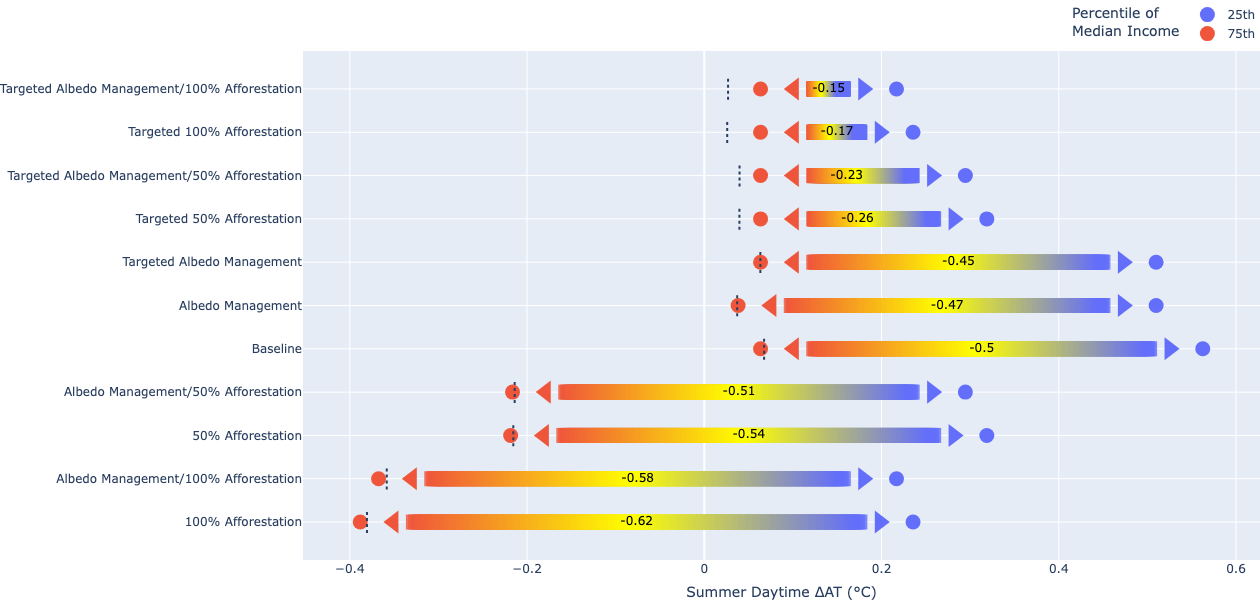

In [6]:
dot_plot(label='$\\Delta$AT Day', 
         sims=['Baseline', 'Albedo Management', 'Targeted Albedo Management', '50% Afforestation', '100% Afforestation', 
               'Targeted 50% Afforestation', 'Targeted 100% Afforestation', 
               'Albedo Management/50% Afforestation', 'Albedo Management/100% Afforestation', 
               'Targeted Albedo Management/50% Afforestation', 'Targeted Albedo Management/100% Afforestation'], 
         xaxis_title='Summer Daytime \u0394AT (\u00b0C)', 
         filename='at_day', y_legend=1.1, arrow_offset=0.0375, linspace_offset=0.06, min_arrow_gap=0.14, min_gap_offset=0.2)

## $\Delta$AT Night

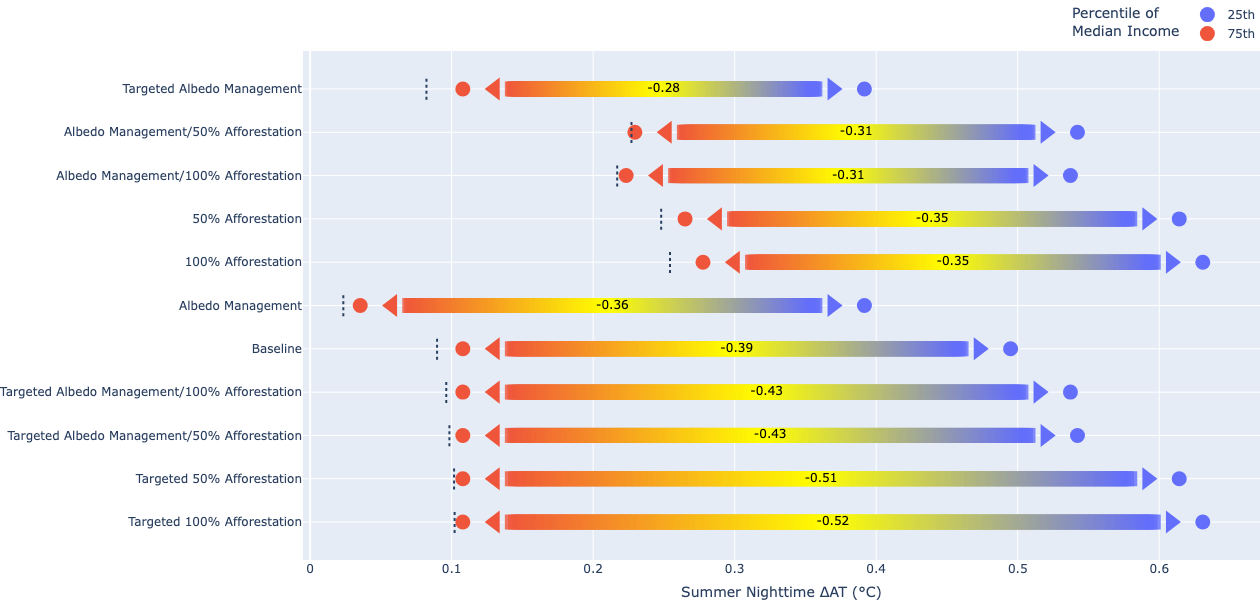

In [7]:
dot_plot(label='$\\Delta$AT Night',
         sims=['Baseline', 'Albedo Management', 'Targeted Albedo Management', '50% Afforestation', '100% Afforestation', 
               'Targeted 50% Afforestation', 'Targeted 100% Afforestation', 
               'Albedo Management/50% Afforestation', 'Albedo Management/100% Afforestation', 
               'Targeted Albedo Management/50% Afforestation', 'Targeted Albedo Management/100% Afforestation'], 
         xaxis_title='Summer Nighttime \u0394AT (\u00b0C)', 
         filename='at_night', y_legend=1.1, width=850, height=600, arrow_offset=0.0225, linspace_offset=0.035, 
         min_arrow_gap=0, min_gap_offset=0)

## $\Delta$LST Day

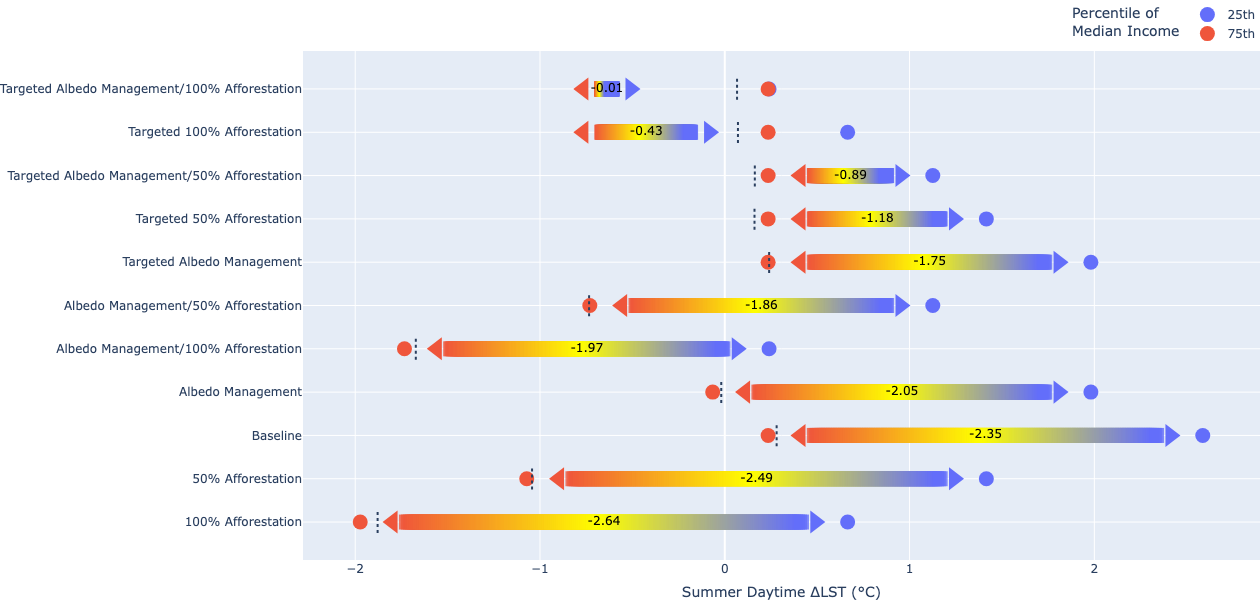

In [8]:
dot_plot(label='$\\Delta$LST Day', 
         sims=['Baseline', 'Albedo Management', 'Targeted Albedo Management', '50% Afforestation', '100% Afforestation', 
               'Targeted 50% Afforestation', 'Targeted 100% Afforestation', 
               'Albedo Management/50% Afforestation', 'Albedo Management/100% Afforestation', 
               'Targeted Albedo Management/50% Afforestation', 'Targeted Albedo Management/100% Afforestation'], 
         xaxis_title='Summer Daytime \u0394LST (\u00b0C)', 
         filename='lst_day', y_legend=1.1, width=850, height=600, arrow_offset=0.175, linspace_offset=0.25, min_arrow_gap=0.44, min_gap_offset=0.575) #0.5)

## $\Delta$LST Night

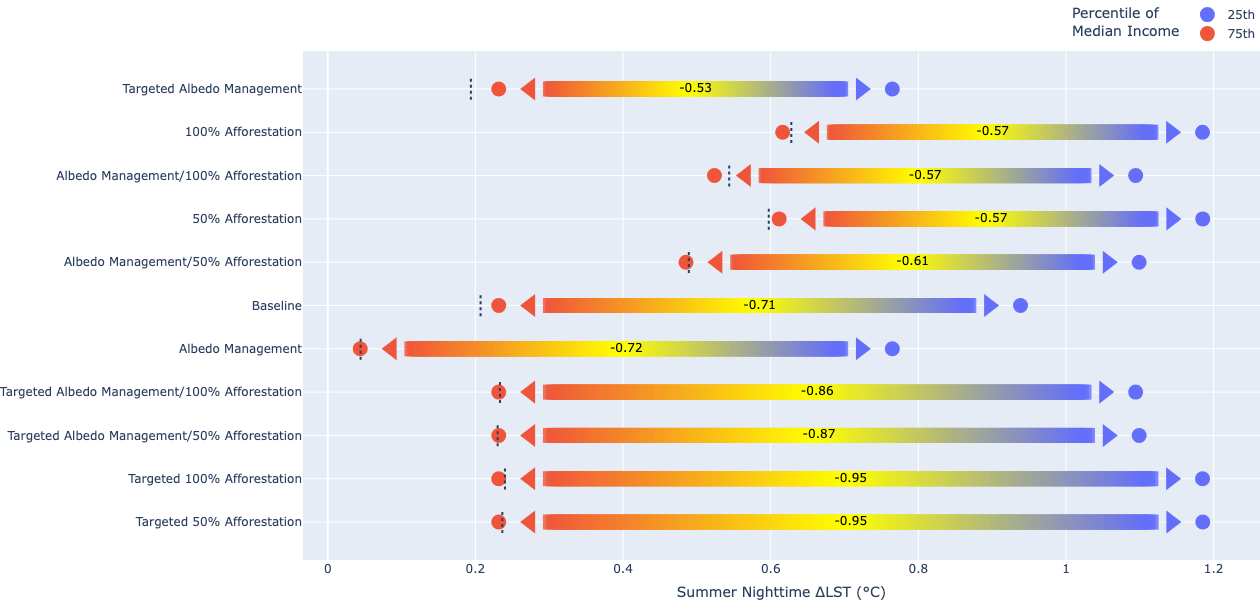

In [9]:
dot_plot(label='$\\Delta$LST Night', 
         sims=['Baseline', 'Albedo Management', 'Targeted Albedo Management', '50% Afforestation', '100% Afforestation', 
               'Targeted 50% Afforestation', 'Targeted 100% Afforestation', 
               'Albedo Management/50% Afforestation', 'Albedo Management/100% Afforestation', 
               'Targeted Albedo Management/50% Afforestation', 'Targeted Albedo Management/100% Afforestation'], 
         xaxis_title='Summer Nighttime \u0394LST (\u00b0C)', 
         filename='lst_night', y_legend=1.1, width=850, height=600, arrow_offset=0.0425, linspace_offset=0.07, min_arrow_gap=0, min_gap_offset=0)